In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import pingouin as pg
import seaborn as sns
sns.set_style("whitegrid")

In [22]:
np.random.seed(31)
df = pd.DataFrame(data={"Col1": np.random.normal(loc=10, scale=2, size=100),
                        "Col2": np.random.normal(loc=12, scale=2.5, size=100)})
df

,Col1,Col2
0,9.170486,15.517944
1,9.333263,7.424665
2,10.162184,11.210171
3,8.417946,7.732312
4,9.562801,13.470638
...,...,...
95,8.985639,10.648207
96,6.049589,12.233770
97,5.321193,16.459399
98,6.788530,12.294013


In [23]:
pg.normality(data=df, alpha=0.05)

,W,pval,normal
Col1,0.974583,0.050050,True
Col2,0.986894,0.430519,True


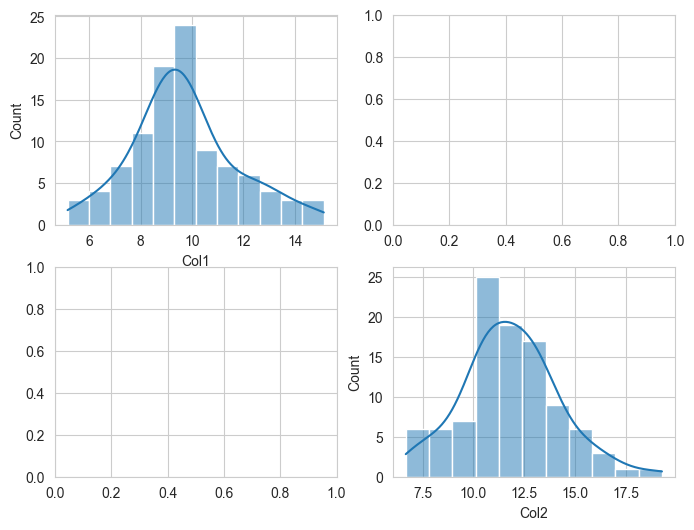

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
sns.histplot(data=df, x="Col1", kde=True, ax=axes[0,0])
print("\n\n")
sns.histplot(data=df, x="Col2", kde=True, ax=axes[1,1])
print("\n\n")
plt.show()

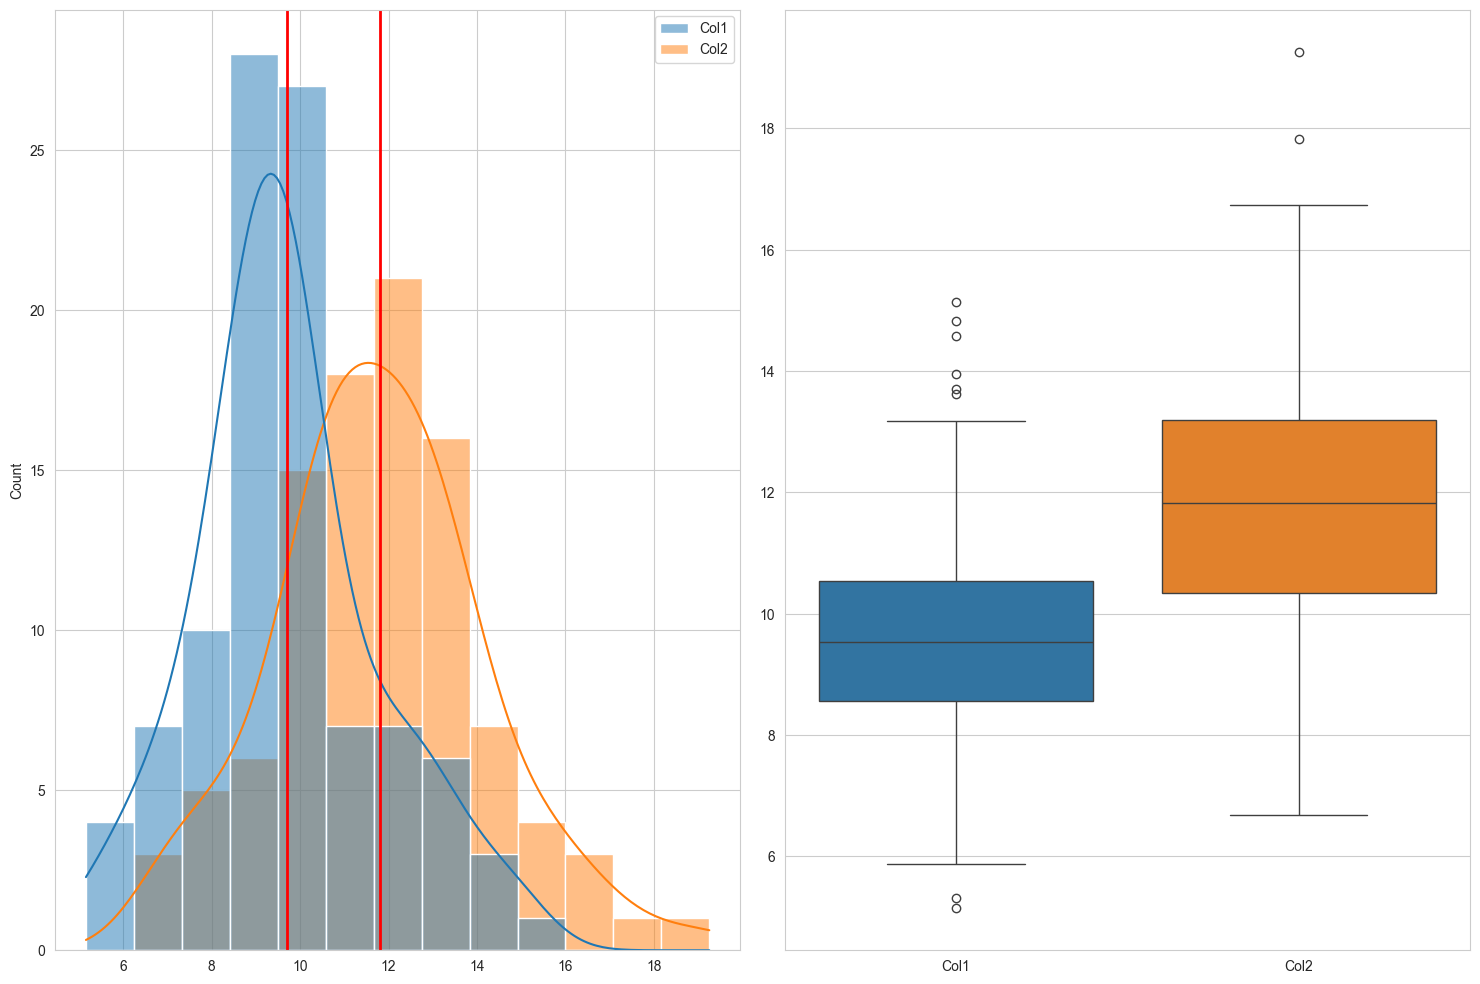

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
sns.histplot(data=df, kde=True, ax=axes[0])
for col in df.columns:
    axes[0].axvline(df[col].mean(), linestyle="-", c="r", linewidth="2")
    #plt.text(df[col].mean() + df[col].std()/8, y=axes.get_ylim()[1] * 0.90, 
             #s="Mean", fontsize=10, c="r")
    plt.tight_layout()
sns.boxplot(data=df, ax=axes[1])


plt.show()
print("\n")

In [26]:
pg.ttest(x=df["Col1"], y=df["Col2"])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-6.695581,198,two-sided,2.165643e-10,"[-2.72, -1.48]",0.946898,3.858e+07,0.999999


In [ ]:
pg.ttest(x=df["Col1"], y=df["Col2"]).loc["T-test", "p-val"]

np.float64(2.17e-10)

this pvalue is too tiny to disprove the null hypothesis.

In [52]:
df1 = pd.DataFrame(data={"col3":np.random.normal(loc=10, scale=1, size=212),
                         "col4":np.random.normal(loc=10.2, scale=1, size=212)})
df1

,col3,col4
0,11.096399,10.093220
1,9.940999,10.904056
2,11.870725,9.787580
3,12.165230,11.479426
4,8.647245,11.688547
...,...,...
207,11.794375,9.421023
208,10.917382,11.065151
209,10.679765,9.960987
210,8.238121,12.985903


In [53]:
pg.normality(data=df1, alpha=0.05)

,W,pval,normal
col3,0.992470,0.349891,True
col4,0.995934,0.849966,True


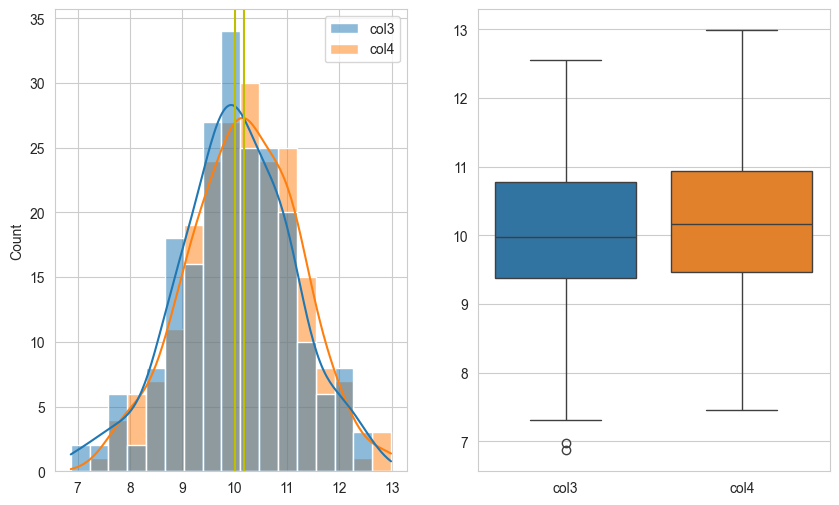

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
sns.histplot(data=df1, kde=True, ax=axes[0])

for col in df1.columns:
    axes[0].axvline(df1[col].mean(), linestyle="-", linewidth=1.5, c="y")
sns.boxplot(data=df1, ax=axes[1])
plt.show()

In [54]:
pg.ttest(x=df1["col3"], y=df1["col4"]).loc["T-test", "p-val"]

np.float64(0.11393800416266914)